In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [47]:
url = 'https://raw.githubusercontent.com/afiqilyasakmal/european-investment-management/main/data/european-investment-management-train.csv'
df = pd.read_csv(url)

In [48]:
# Melihat jumlah baris (data) dan atribut
total_rows, total_attributes = df.shape
print()
print('Jumlah data: ', total_rows)
print('Jumlah atribut: ', total_attributes)


Jumlah data:  22420
Jumlah atribut:  117


In [49]:
# Statistik deskriptif untuk data numerik
df.describe()

,equity_size_score,price_prospective_earnings,price_book_ratio,price_sales_ratio,price_cash_flow_ratio,dividend_yield_factor,long_term_projected_earnings_growth,historical_earnings_growth,sales_growth,cash_flow_growth,book_value_growth,roa,roe,roic,average_coupon_rate,average_credit_quality,modified_duration,effective_maturity,asset_stock,asset_bond,asset_cash,asset_other,sector_basic_materials,sector_consumer_cyclical,sector_financial_services,sector_real_estate,sector_consumer_defensive,sector_healthcare,sector_utilities,sector_communication_services,sector_energy,sector_industrials,sector_technology,market_cap_giant,market_cap_large,market_cap_medium,market_cap_small,market_cap_micro,credit_aaa,credit_aa,credit_a,credit_bbb,credit_bb,credit_b,credit_below_b,credit_not_rated,holdings_n_stock,holdings_n_bonds,ongoing_cost,management_fees,environmental_score,social_score,governance_score,sustainability_score,sustainability_rank,sustainability_percentage_rank,involvement_abortive_contraceptive,involvement_alcohol,involvement_animal_testing,involvement_controversial_weapons,involvement_gambling,involvement_gmo,involvement_military_contracting,involvement_nuclear,involvement_palm_oil,involvement_pesticides,involvement_small_arms,involvement_thermal_coal,involvement_tobacco,nav_per_share,shareclass_size,fund_size,fund_trailing_return_ytd,fund_trailing_return_3years,fund_trailing_return_5years,fund_trailing_return_10years,fund_return_2019,fund_return_2018,fund_return_2017,fund_return_2016,fund_return_2015,fund_return_2020_q3,fund_return_2020_q2,fund_return_2020_q1,fund_return_2019_q4,fund_return_2019_q3,fund_return_2019_q2,fund_return_2019_q1,fund_return_2018_q4,fund_return_2018_q3,fund_return_2018_q2,fund_return_2018_q1,fund_return_2017_q4,fund_return_2017_q3,fund_return_2017_q2,fund_return_2017_q1,fund_return_2016_q4,fund_return_2016_q3,fund_return_2016_q2,fund_return_2016_q1,fund_return_2015_q4,fund_return_2015_q3,fund_return_2015_q2,fund_return_2015_q1,quarters_up,quarters_down,rating
count,22420.000000,22414.000000,22416.000000,22412.000000,22365.000000,22420.000000,22420.000000,22414.000000,22360.000000,22270.000000,22366.000000,22211.000000,22175.000000,21027.000000,6069.000000,2526.000000,1728.000000,1891.000000,22420.000000,22420.000000,22420.000000,22420.000000,19451.000000,20807.000000,20347.000000,17036.000000,19995.000000,19901.000000,16251.000000,20173.000000,16785.000000,20683.000000,20299.000000,22355.000000,22355.000000,22355.000000,22355.000000,22355.000000,2523.000000,2523.000000,2523.000000,2523.000000,2523.000000,2523.000000,2523.000000,2523.000000,19321.000000,4129.000000,21795.000000,21636.000000,17951.000000,17951.000000,17951.00000,19364.000000,19347.000000,19347.000000,22410.000000,22410.000000,22410.000000,22410.000000,22410.000000,22410.000000,22410.000000,22410.000000,22410.000000,22410.000000,22410.000000,22410.000000,22410.000000,2.241000e+04,2.200200e+04,2.206300e+04,22332.000000,21777.000000,18376.000000,9998.000000,21553.00000,20993.000000,19491.000000,17801.000000,15816.000000,22068.000000,22079.000000,22106.000000,22099.000000,22112.000000,22104.000000,21983.000000,21941.000000,21932.000000,21840.000000,21729.000000,21531.000000,21172.000000,20765.000000,20319.000000,19843.000000,19567.000000,19111.000000,18731.000000,18227.000000,17822.000000,17369.000000,16875.000000,22420.000000,22420.000000,22420.000000
mean,248.644322,19.336289,2.205785,1.785284,9.436724,3.111079,10.142689,5.847373,4.356577,7.687757,6.323045,6.028149,16.106231,10.392178,3.559015,10.983769,5.348131,8.155082,85.367798,8.938076,2.932468,2.761574,7.724613,12.045993,16.402046,7.019255,9.935561,12.462306,4.811395,9.444906,5.063015,11.924138,16.423713,35.316409,31.377121,22.965711,7.868733,2.458650,19.611272,11.624939,13.804701,24.913884,13.182172,8.521348,2.520392,5.820717,169.227317,219.340518,1.136168,0.852358,4.942680,9.509295,7.81176,23.852863,3.129167,45.695457,6.184667,1.377189,14.906450,0.664540,0.519091,0.029556,1.139705,1

In [50]:
# Statistik yang include data non-numerik
df.describe(include=['object'])

,ticker,category,dividend_frequency,equity_style,equity_size,bond_interest_rate_sensitivity,bond_credit_quality,nav_per_share_currency,shareclass_size_currency,fund_size_currency
count,22420,22420,10435,22420,22420,2287,2287,22410,22002,22063
unique,22420,196,4,3,3,3,3,17,15,13
top,0P000153IG,Global Emerging Markets Equity,Annually,Blend,Large,High,Low,EUR,USD,USD
freq,1,1422,7856,11010,17767,994,1270,6901,7976,9517


In [51]:
# Jumlah data duplikat (asumsi ticker menggambarkan reksa dana yang berbeda-beda)
df.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
22415    False
22416    False
22417    False
22418    False
22419    False
Length: 22420, dtype: bool>

In [52]:
df_without_ticker = df.drop('ticker', axis=1)

In [53]:
# Duplikasi data tanpa menyertakan kolom ticker
df_without_ticker.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
22415    False
22416    False
22417    False
22418    False
22419    False
Length: 22420, dtype: bool>

In [54]:
# Fungsi untuk mengecek missing value
def get_missing_info(df, top_n=60):

    missing_values = df.isnull().sum()
    missing_percentage = (df.isnull().sum() / len(df)) * 100

    missing_info = pd.DataFrame({
        'Column': missing_values.index,
        'Missing Values': missing_values.values,
        'Missing Values Percentage': missing_percentage.values
    })

    missing_info = missing_info.sort_values(by='Missing Values Percentage', ascending=False)
    missing_info = missing_info.head(top_n)

    return missing_info

In [55]:
result_missing_info = get_missing_info(df)
print(result_missing_info)

                             Column  Missing Values  Missing Values Percentage
23                modified_duration           20692                  92.292596
24               effective_maturity           20529                  91.565566
20              bond_credit_quality           20133                  89.799286
19   bond_interest_rate_sensitivity           20133                  89.799286
52                 credit_not_rated           19897                  88.746655
51                   credit_below_b           19897                  88.746655
45                       credit_aaa           19897                  88.746655
46                        credit_aa           19897                  88.746655
47                         credit_a           19897                  88.746655
48                       credit_bbb           19897                  88.746655
49                        credit_bb           19897                  88.746655
50                         credit_b           19897 

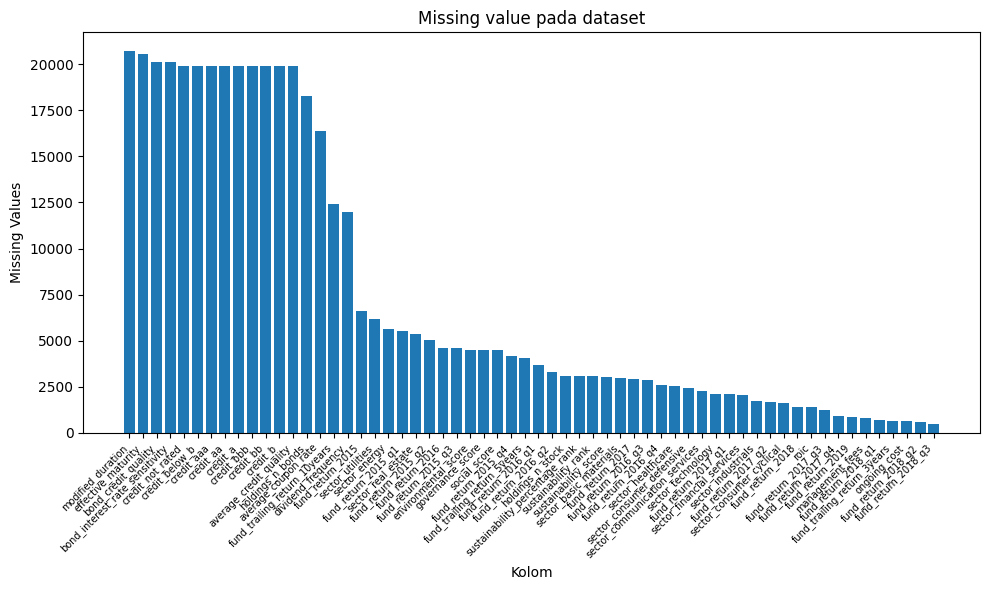

In [56]:
# Buat bar chart
plt.figure(figsize=(10, 6))
plt.bar(result_missing_info['Column'], result_missing_info['Missing Values'])
plt.xlabel('Kolom')
plt.ylabel('Missing Values')
plt.title('Missing value pada dataset')
plt.xticks(rotation=45, ha='right', fontsize=7)
plt.tight_layout()

# Tampilkan grafik
plt.show()

In [57]:
result_missing_info.head(20)

,Column,Missing Values,Missing Values Percentage
23,modified_duration,20692,92.292596
24,effective_maturity,20529,91.565566
20,bond_credit_quality,20133,89.799286
19,bond_interest_rate_sensitivity,20133,89.799286
52,credit_not_rated,19897,88.746655
51,credit_below_b,19897,88.746655
45,credit_aaa,19897,88.746655
46,credit_aa,19897,88.746655
47,credit_a,19897,88.746655
48,credit_bbb,19897,88.746655


In [58]:
# Mengecek outlier
Q3 = df.quantile(0.75)
Q1 = df.quantile(0.25)
IQR = Q3-Q1

jumlah_outlier= []
pd.set_option('display.max_columns', None)
for col in df.select_dtypes(np.number).columns:
    outliers = ((df[col] < (Q1[col] - 1.5 * IQR[col])) | (df[col] > (Q3[col] + 1.5 * IQR[col]))).sum()
    jumlah_outlier.append([col, outliers, outliers/len(df)])

indexOutput0 = list(range(0, len(jumlah_outlier)))

df_outlier = pd.DataFrame(jumlah_outlier, columns=['column', 'outlier','persentase'],index=indexOutput0).sort_values(by=['persentase'], ascending = False,ignore_index=True)

df_outlier

<ipython-input-58-7a9d39679ba0>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-58-7a9d39679ba0>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)


,column,outlier,persentase
0,asset_bond,5384,0.240143
1,asset_stock,4672,0.208385
2,involvement_palm_oil,4436,0.197859
3,asset_other,3848,0.171632
4,involvement_gmo,3572,0.159322
...,...,...,...
102,modified_duration,28,0.001249
103,management_fees,20,0.000892
104,credit_bbb,15,0.000669
105,sustainability_percentage_rank,0,0.000000


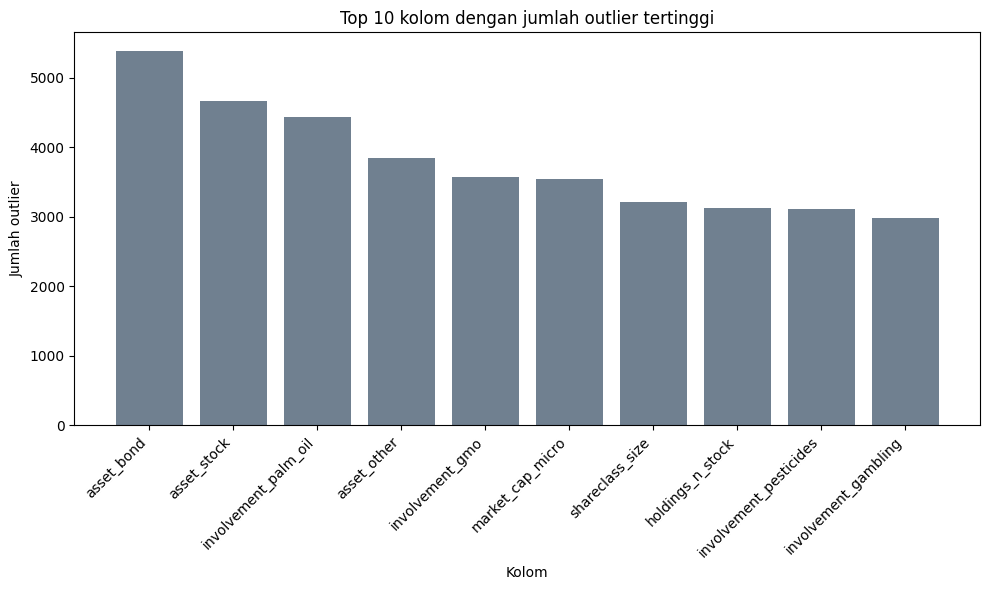

In [59]:
# Pilih top 10 kolom dengan jumlah outlier tertinggi
top_10_outliers = df_outlier.nlargest(10, 'outlier')

# Buat bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_10_outliers['column'], top_10_outliers['outlier'], color='slategrey')
plt.xlabel('Kolom')
plt.ylabel('Jumlah outlier')
plt.title('Top 10 kolom dengan jumlah outlier tertinggi')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Tampilkan grafik
plt.show()